# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


# 1. Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [ ]:


data_train = data_train.dropna()

rougher_output = data_train['rougher.output.recovery']

#data_train['rougher.output.recovery'].head()
print(data_train['rougher.output.recovery'].isna().sum())
#print(data_train['rougher.output.tail_au'].isna().sum())


In [3]:

data_test.head()


In [4]:

data_full.head()


Здесь я добавил требуемые библиотеки и сделал вычитку данных из файлов, а также удалил пропущенные значения на тренеровочной выборке.

In [6]:

rougher_output_recovery_train = ( data_train['rougher.output.concentrate_au'] * ( data_train['rougher.input.feed_au'] - data_train['rougher.output.tail_au'] ) ) / ( data_train['rougher.input.feed_au'] * ( data_train['rougher.output.concentrate_au'] - data_train['rougher.output.tail_au'] )  ) * 100


rougher_output_recovery_train = rougher_output_recovery_train.replace([np.inf, -np.inf], np.nan)



rougher_output_recovery_train = pd.Series(rougher_output_recovery_train)



rougher_output_recovery_train = rougher_output_recovery_train.dropna()


print(rougher_output_recovery_train.isna().sum())



print(rougher_output.shape)
print(rougher_output_recovery_train.shape)

0
(11017,)
(11017,)


На данном этапе я избавлялся от пропусков в rougher_output_recovery_train

In [7]:

mae =  mean_absolute_error(rougher_output, rougher_output_recovery_train)

print(' MAE между расчетами :', mae )



 MAE между расчетами : 9.555596961987514e-15


После замены пропусков на средние значения значение показателя MAE стало 9.555596961987514e-15

In [7]:

data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [9]:
data_train = data_train.fillna(data_train.mean())
data_test = data_test.fillna(data_test.mean())

На данном этапе я делаю вычитку данных из файлов, заполняю пропуски в данных средними значениями, рассчитываю по показателям эффективность обогащения и нахожу метрику MAE между моими расчетами и данными в таблице, а также смотрю и сравниваю список столбцов тренировочной и тестовой выборками.

# 2. Анализ данных

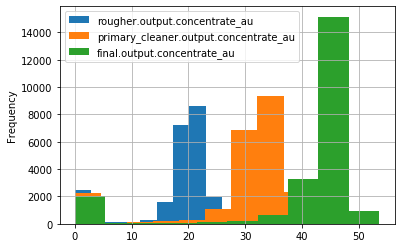

In [10]:
data_full['rougher.output.concentrate_au'].plot(kind = 'hist', label = 'rougher.output.concentrate_au', grid=True, legend=True)
data_full['primary_cleaner.output.concentrate_au'].plot(kind='hist' , label='primary_cleaner.output.concentrate_au', grid=True, legend=True)
data_full['final.output.concentrate_au'].plot(kind='hist', label='final.output.concentrate_au', grid=True, legend=True)




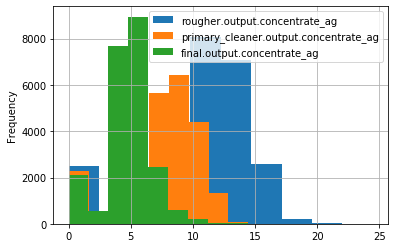

In [11]:
data_full['rougher.output.concentrate_ag'].plot(kind = 'hist', label = 'rougher.output.concentrate_ag', grid=True, legend=True)
data_full['primary_cleaner.output.concentrate_ag'].plot(kind='hist' , label='primary_cleaner.output.concentrate_ag', grid=True, legend=True)
data_full['final.output.concentrate_ag'].plot(kind='hist', label='final.output.concentrate_ag', grid=True, legend=True)




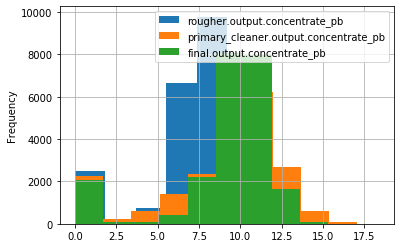

In [12]:
data_full['rougher.output.concentrate_pb'].plot(kind = 'hist', label = 'rougher.output.concentrate_pb', grid=True, legend=True)
data_full['primary_cleaner.output.concentrate_pb'].plot(kind='hist' , label='primary_cleaner.output.concentrate_pb', grid=True, legend=True)
data_full['final.output.concentrate_pb'].plot(kind='hist', label='final.output.concentrate_pb', grid=True, legend=True)




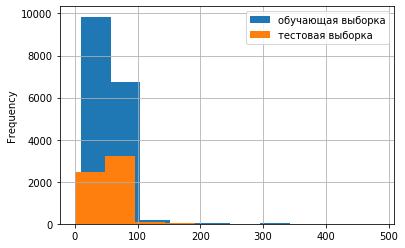

In [13]:
data_train['rougher.input.feed_size'].plot(kind='hist', label='обучающая выборка', grid=True, legend=True)
data_test['rougher.input.feed_size'].plot(kind='hist', label='тестовая выборка', grid=True, legend=True)

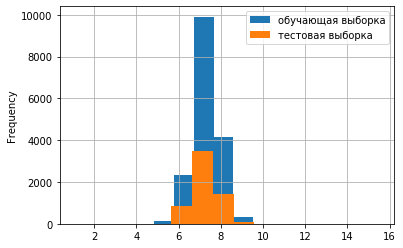

In [14]:
data_train['primary_cleaner.input.feed_size'].plot(kind='hist', label='обучающая выборка', grid=True, legend=True)
data_test['primary_cleaner.input.feed_size'].plot(kind='hist', label='тестовая выборка', grid=True, legend=True)

На всех предыдущих графиках распределение концентраций на разных этапах и размеры гранул на тренеровочной и тестовой выборках выглядит схожим образом.

In [15]:
data_train['rougher.output.concentrate_au'] = data_train['rougher.output.concentrate_au'].fillna(data_train['rougher.output.concentrate_au'].mean())
data_train['rougher.output.concentrate_ag'] = data_train['rougher.output.concentrate_ag'].fillna(data_train['rougher.output.concentrate_ag'].mean())
data_train['rougher.output.concentrate_pb'] = data_train['rougher.output.concentrate_pb'].fillna(data_train['rougher.output.concentrate_pb'].mean())

print(data_train['rougher.output.concentrate_au'].isna().sum())
print(data_train['rougher.output.concentrate_ag'].isna().sum())
print(data_train['rougher.output.concentrate_pb'].isna().sum())



0
0
0


In [16]:
data_train['primary_cleaner.output.concentrate_au'] = data_train['primary_cleaner.output.concentrate_au'].fillna(data_train['primary_cleaner.output.concentrate_au'].mean())
data_train['primary_cleaner.output.concentrate_ag'] = data_train['primary_cleaner.output.concentrate_ag'].fillna(data_train['primary_cleaner.output.concentrate_ag'].mean())
data_train['primary_cleaner.output.concentrate_pb'] = data_train['primary_cleaner.output.concentrate_pb'].fillna(data_train['primary_cleaner.output.concentrate_pb'].mean())

print(data_train['primary_cleaner.output.concentrate_au'].isna().sum())
print(data_train['primary_cleaner.output.concentrate_ag'].isna().sum())
print(data_train['primary_cleaner.output.concentrate_pb'].isna().sum())




0
0
0


In [17]:
data_train['final.output.concentrate_au'] = data_train['final.output.concentrate_au'].fillna(data_train['final.output.concentrate_au'].mean())

data_train['final.output.concentrate_ag'] = data_train['final.output.concentrate_ag'].fillna(data_train['final.output.concentrate_ag'].mean())

data_train['final.output.concentrate_pb'] = data_train['final.output.concentrate_pb'].fillna(data_train['final.output.concentrate_pb'].mean())

print(data_train['final.output.concentrate_au'].isna().sum())
print(data_train['final.output.concentrate_ag'].isna().sum())
print(data_train['final.output.concentrate_pb'].isna().sum())



0
0
0


Здесь я корректирую данные и делаю вычисления для построения итогового графика

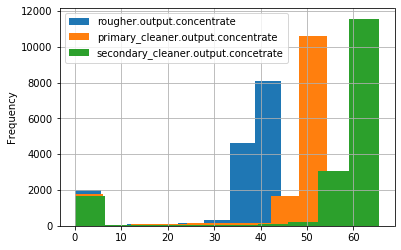

In [18]:
data_train['sum_concentrate_rougher'] = data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] + data_train['rougher.output.concentrate_pb']

data_train['sum_concentrate_rougher'].plot(kind='hist', label='rougher.output.concentrate', grid=True, legend=True)

data_train['sum_concentrate_primary_cleaner'] = data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_ag'] + data_train['primary_cleaner.output.concentrate_pb']

data_train['sum_concentrate_primary_cleaner'].plot(kind='hist', label='primary_cleaner.output.concentrate', grid=True, legend=True)

data_train['sum_concentrate_secondary_cleaner'] = data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + data_train['final.output.concentrate_pb']

data_train['sum_concentrate_secondary_cleaner'].plot(kind='hist', label='secondary_cleaner.output.concetrate', grid=True, legend=True)




На графике явно видно, что есть выбросы в суммарной концентрации на всех трех этапах очистки

In [19]:
data_train.rename(columns={'rougher.output.concentrate_au' : 'rougher_output_concentrate_au', 'rougher.output.concentrate_ag' : 'rougher_output_concentrate_ag', 'rougher.output.concentrate_pb' : 'rougher_output_concentrate_pb'}, inplace=True)

data_train.rename(columns={'primary_cleaner.output.concentrate_au' : 'primary_cleaner_output_concentrate_au', 'primary_cleaner.output.concentrate_ag' : 'primary_cleaner_output_concentrate_ag', 'primary_cleaner.output.concentrate_pb' : 'primary_cleaner_output_concentrate_pb'}, inplace=True)

data_train.rename(columns={'final.output.concentrate_au' : 'final_output_concentrate_au', 'final.output.concentrate_ag' : 'final_output_concentrate_ag', 'final.output.concentrate_pb' : 'final_output_concentrate_pb'}, inplace=True)






In [20]:
data_train = data_train.query('sum_concentrate_rougher > 6.0')
data_train = data_train.query('sum_concentrate_primary_cleaner > 6.0')
data_train = data_train.query('sum_concentrate_secondary_cleaner > 6.0')


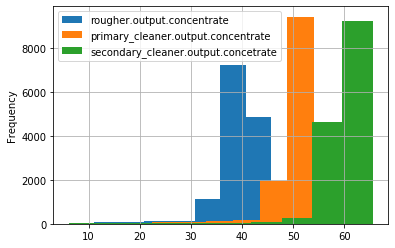

In [21]:
data_train['sum_concentrate_rougher'].plot(kind='hist', label='rougher.output.concentrate', grid=True, legend=True)

data_train['sum_concentrate_primary_cleaner'].plot(kind='hist', label='primary_cleaner.output.concentrate', grid=True, legend=True)

data_train['sum_concentrate_secondary_cleaner'].plot(kind='hist', label='secondary_cleaner.output.concetrate', grid=True, legend=True)


На данном этапе я строил графики и смотрел распределение концентраций на разных этапах и двух выборках, тестовой и тренировочной. Также на последнем графике определяю выбросы в данных и удаляю их для того, чтобы предсказанее оказалось точнее

# 3. Модель

In [23]:
def sMAPE(predict, target):
    target = target.array
    count_sum = 0
    for i in range(len(predict)):
        yi= target[i]
        y_i = predict[i]
        summa = abs(yi - y_i) / (abs(yi + y_i) / 2) * 100
        count_sum += summa
    smape = count_sum / len(predict)
    return smape

In [24]:
def sMAPE_last(smape_rougher, smape_final):
    smape_last = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_last

In [25]:
data_date_test = data_train['date']
data_date_test.shape

(14389,)

In [26]:
data_test_1 = data_full.query('date in @data_date_test')



data_target_test_rougher = data_test_1['rougher.output.recovery']

data_target_test_final = data_test_1['final.output.recovery']

data_target_test_rougher.shape


(14389,)

In [27]:
columns = ['final_output_concentrate_ag', 'final_output_concentrate_pb', 'final.output.concentrate_sol',
'final_output_concentrate_au','final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_sol',
'final.output.tail_au', 'primary_cleaner_output_concentrate_ag', 'primary_cleaner_output_concentrate_pb', 'primary_cleaner_output_concentrate_au',
          'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate',
'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed',
'rougher.calculation.au_pb_ratio', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol',
'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_sol',
'rougher_output_concentrate_au', 'rougher.output.tail_ag', 'rougher.output.tail_au', 'rougher.output.tail_pb', 'rougher.output.tail_sol',
'rougher_output_concentrate_ag', 'rougher_output_concentrate_pb']

data_train1 = data_train.drop(columns, axis=1)
data_train1.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 14389 entries, 0 to 16859
Data columns (total 58 columns):
date                                          14389 non-null object
final.output.recovery                         14389 non-null float64
primary_cleaner.input.sulfate                 14389 non-null float64
primary_cleaner.input.depressant              14389 non-null float64
primary_cleaner.input.feed_size               14389 non-null float64
primary_cleaner.input.xanthate                14389 non-null float64
primary_cleaner.state.floatbank8_a_air        14389 non-null float64
primary_cleaner.state.floatbank8_a_level      14389 non-null float64
primary_cleaner.state.floatbank8_b_air        14389 non-null float64
primary_cleaner.state.floatbank8_b_level      14389 non-null float64
primary_cleaner.state.floatbank8_c_air        14389 non-null float64
primary_cleaner.state.floatbank8_c_level      14389 non-null float64
primary_cleaner.state.floatbank8_d_air        14389 non-null flo

Здесь я удаляю столбцы, которых нет в тестовой выборке.

In [28]:

encoder = OrdinalEncoder()
data_ordinal_train = pd.DataFrame(encoder.fit_transform(data_train1),columns=data_train1.columns)
data_ordinal_test = pd.DataFrame(encoder.fit_transform(data_test),columns=data_test.columns)


target_train_rougher = data_train1['rougher.output.recovery']
target_train_recovery = data_train1['final.output.recovery']
rougher_output_recovery = data_ordinal_train['rougher.output.recovery']
features_train_rougher = data_ordinal_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery', 'sum_concentrate_rougher', 'sum_concentrate_primary_cleaner', 'sum_concentrate_secondary_cleaner'], axis=1)
features_test_rougher = data_ordinal_test.drop(['date'], axis=1)


print(features_train_rougher.isna().sum())
print(target_train_rougher.shape)




primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

Здесь я подготовил данные для обучения модели

In [29]:
model_1 = LinearRegression()
model_1.fit(features_train_rougher, target_train_rougher)
scores = cross_val_score(model_1, features_train_rougher, target_train_rougher, cv=7)

final_score = sum(scores) / len(scores)

print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: -0.23640375845530523


На данном этапе я подготовил данные для обучения модели, а также оцениваю качество кросс_валидацией

In [30]:
data_target_test_rougher = data_target_test_rougher.fillna(data_target_test_rougher.mean())
print(data_target_test_rougher.isna().sum())

0


In [31]:
predict_test_rougher = model_1.predict(features_test_rougher)
predict_test_rougher = pd.Series(predict_test_rougher)
smape_rougher = sMAPE(predict_test_rougher, data_target_test_rougher)
print(smape_rougher)



8.184440005022886


Здесь я использую ранее написанную функцию для расчета sMAPE и вычисляю данную метрику для этапа rougher

In [32]:
features_test_rougher['rougher.output.recovery'] = predict_test_rougher
features_train_rougher['rougher.output.recovery'] = rougher_output_recovery
features_test_rougher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
primary_cleaner.input.sulfate                 5856 non-null float64
primary_cleaner.input.depressant              5856 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5856 non-null float64
primary_cleaner.state.floatbank8_a_air        5856 non-null float64
primary_cleaner.state.floatbank8_a_level      5856 non-null float64
primary_cleaner.state.floatbank8_b_air        5856 non-null float64
primary_cleaner.state.floatbank8_b_level      5856 non-null float64
primary_cleaner.state.floatbank8_c_air        5856 non-null float64
primary_cleaner.state.floatbank8_c_level      5856 non-null float64
primary_cleaner.state.floatbank8_d_air        5856 non-null float64
primary_cleaner.state.floatbank8_d_level      5856 non-null float64
rougher.input.feed_ag                         5856 non-null float64
rougher.i

Здесь я добавляю стобел rougher.output.recovery для дальнейшего обучения модели и предсказывания final.output.recovery для тестовой выборки

In [33]:
data_target_test_final = data_target_test_final.fillna(data_target_test_final.mean())
print(data_target_test_final.isna().sum())

0


In [34]:
model_1_last = LinearRegression()
model_1_last.fit(features_train_rougher, target_train_recovery)
predict_test_final = model_1_last.predict(features_test_rougher)
predict_test_final = pd.Series(predict_test_final)
smape_final = sMAPE(predict_test_final, data_target_test_final)
print(smape_final)

22.110793497764973


Теперь я нахожу sMAPE для финального этапа

In [35]:
smape_last = sMAPE_last(smape_rougher, smape_final)
print(smape_last)

18.62920512457945


На данном этапе я нахожу итоговое sMAPE, используя полученные до этого данные, и получаю значение итогового sMAPE = 18.6

Наиболее быстрый результат я получил при использовании модели линейной регрессии